In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

In [4]:
# Renaming branches
def rename_values(df):
    branch_map = {
        "Alex": "OBA",
        "Giza": "Bazarstore",
        "Cairo": "Bravo"
    }
    city_map = {
        "Yangon": "Nizami",
        "Mandalay": "Yasamal",
        "Naypyitaw": "Narimanov"
    }
    df["branch"] = df["branch"].replace(branch_map)
    df["city"] = df["city"].replace(city_map)
    return df

In [5]:
# Cleaning
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    return df

In [6]:
# Converting
def convert_types(df):
    df["date"] = pd.to_datetime(df["date"], format="%m/%d/%Y", errors="coerce")
    df["time"] = pd.to_datetime(df["time"], format="%I:%M:%S %p").dt.time
    return df
def add_time_features(df):
    df["hour"] = df["time"].apply(lambda t: t.hour if pd.notnull(t) else np.nan)
    df["month"] = df["date"].dt.to_period("M")
    df["weekday"] = df["date"].dt.day_name()
    return df


In [29]:
def analyze_sales(df):
    results = {}
    results["sales_by_category"] = (
        df.groupby("product_line")["sales"].sum().reset_index().sort_values(by="sales", ascending=False)
    )

    results["sales_by_hour"] = (
        df.groupby("hour")["sales"].sum().reset_index().sort_values(by="sales", ascending=False)
    )

    results["sales_by_branch"] = (
        df.groupby("branch")["sales"].sum().reset_index().sort_values(by="sales", ascending=False)
    )

    results["sales_by_city"] = (
        df.groupby("city")["sales"].sum().reset_index().sort_values(by="sales", ascending=False)
    )

    results["sales_by_month"] = (
        df.groupby("month")["sales"].sum().reset_index().sort_values(by="sales", ascending=False)
    )
    results["sales_by_month"]["month"] = results["sales_by_month"]["month"].astype(str)

    results["sales_by_weekday"] = (
        df.groupby("weekday")["sales"].sum().reindex(
            ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]).reset_index().sort_values(by="sales", ascending=False)
    )

    results["sales_heatmap"] = (
        df.groupby(["weekday","hour"])["sales"].sum().unstack().reindex(
            ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
        )
    )

    return results

In [8]:
def plot_bar(data, x, y, title, rotation=0, palette=None):
    plt.figure(figsize=(8,5))
    sns.barplot(x=x, y=y, data=data, palette=palette)
    plt.title(title)
    plt.xticks(rotation=rotation)
    plt.show()

def plot_heatmap(data, title):
    plt.figure(figsize=(12,6))
    sns.heatmap(data, cmap="YlGnBu", annot=True, fmt=".0f")
    plt.title(title)
    plt.xlabel("Hour of Day")
    plt.ylabel("Weekday")
    plt.show()

In [9]:
def run_pipeline(file_path):
    # Loading and cleaning
    df = load_data(file_path)
    df = clean_columns(df)
    df = convert_types(df)
    df = add_time_features(df)
    df = rename_values(df)
    # Analyzing
    results = analyze_sales(df)

    # Plotting examples
    plot_bar(results["sales_by_category"], "product_line", "sales", "Sales by Category", rotation=45)
    plot_bar(results["sales_by_hour"], "hour", "sales", "Sales by Hour")
    plot_bar(results["sales_by_branch"], "branch", "sales", "Sales by Branch")
    plot_bar(results["sales_by_city"], "city", "sales", "Sales by City")
    plot_bar(results["sales_by_month"], "month", "sales", "Sales by Month", rotation=45, palette="viridis")
    plot_bar(results["sales_by_weekday"], "weekday", "sales", "Sales by Weekday", rotation=45)
    plot_heatmap(results["sales_heatmap"], "Sales Heatmap by Weekday and Hour")

    return df, results

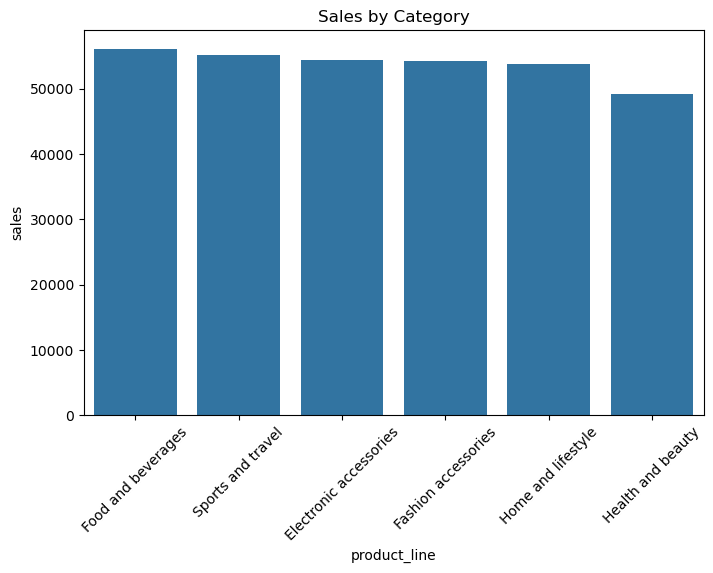

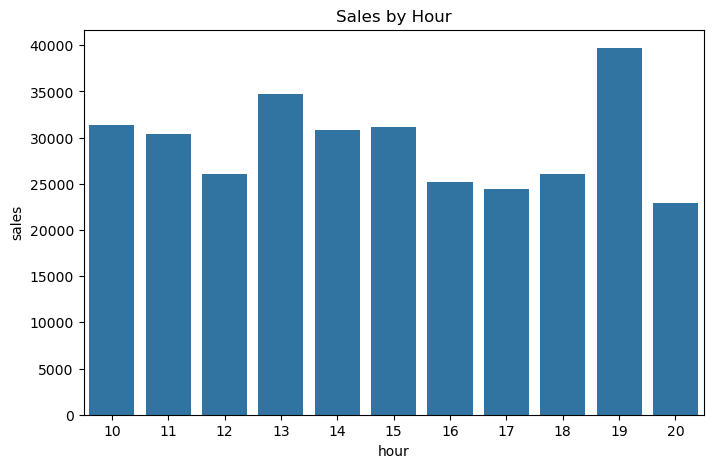

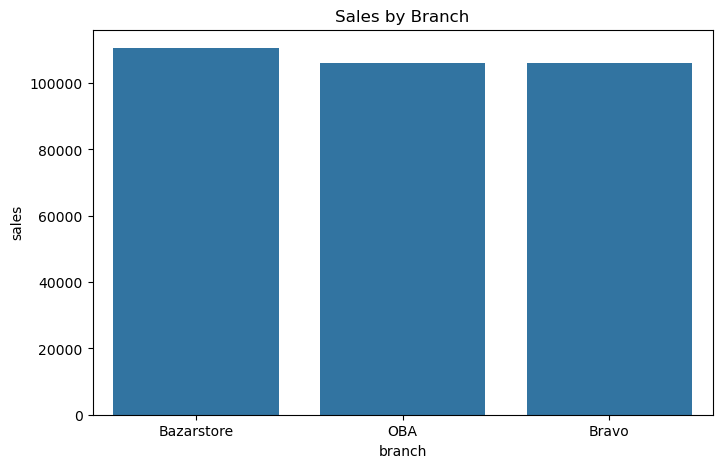

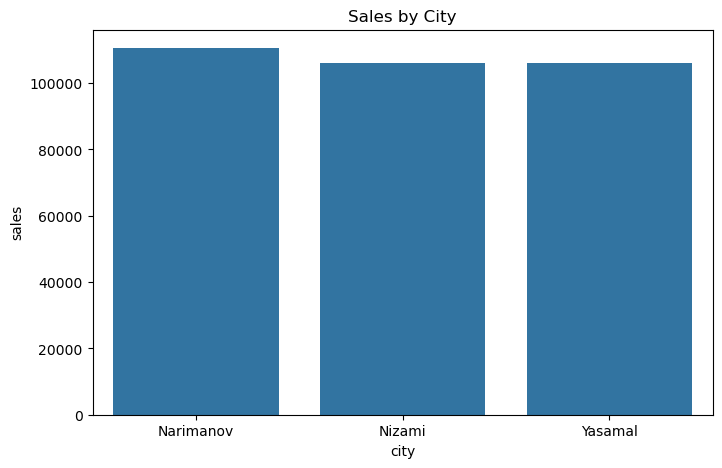

C:\Users\EmilAzimov\AppData\Local\Temp\ipykernel_10152\164029158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, palette=palette)


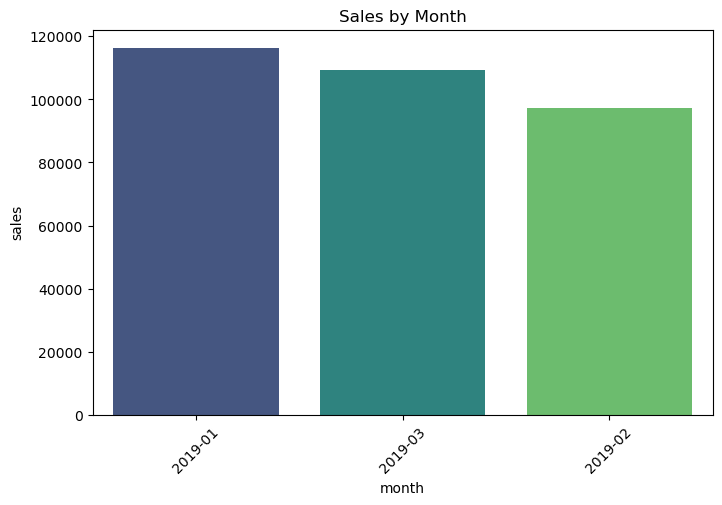

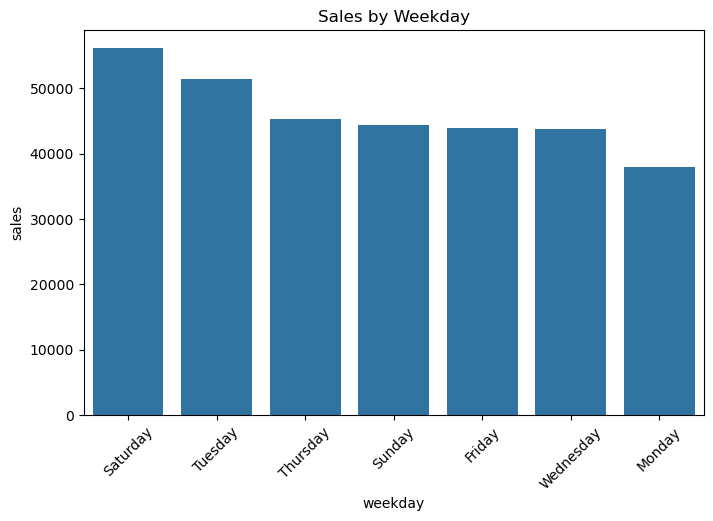

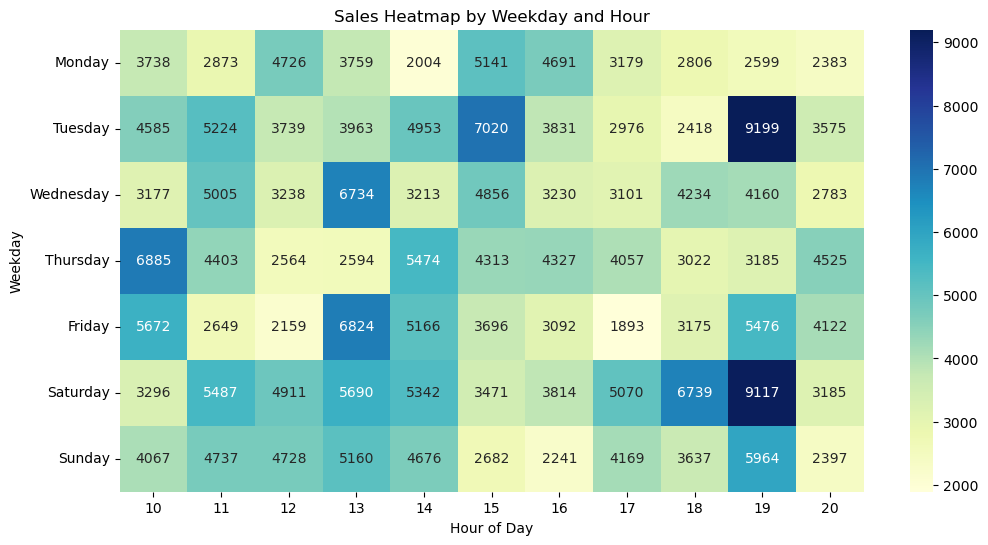

In [30]:
df, results = run_pipeline("SuperMarket Analysis.csv")


In [31]:
results["sales_by_weekday"]


,weekday,sales
5,Saturday,56120.8095
1,Tuesday,51482.2455
3,Thursday,45349.2480
6,Sunday,44457.8925
4,Friday,43926.3405
2,Wednesday,43731.1350
0,Monday,37899.0780
